In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/admin/Documents/University/diss-data-collection/Sample/coded_sample.csv"
data = pd.read_csv(file_path)

# Convert 'engagement' column to numeric (float)
data['engagement'] = pd.to_numeric(data['engagement'], errors='coerce')

# Plot the regression
sns.regplot(x='engagement', y='Parasocial', data=data)

# Add labels and title
plt.xlabel('Engagement')
plt.ylabel('Parasocial')
plt.title('Regression between Engagement and Parasocial Language')

# Show the plot
plt.show()


KeyError: 'engagement'

In [ ]:
'Adding engagement'


Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Amouranth
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Angory_Tom
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-DanTDM
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-KittyKatGaming
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-LazarBeam
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NakeyJakey
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-Pokimane
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-legendarylea
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-lilypichu
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.convokit/downloads/subreddit-NinjasHyper
Dataset already exists at /Users/admin/.

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset_rounded.csv"
data = pd.read_csv(file_path)

# Convert non-numeric values to NaN in the 'engagement' column
data['engagement'] = pd.to_numeric(data['engagement'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Define the independent and dependent variables
X = data[['Parasocial_Language']]  # Independent variable(s)
X = sm.add_constant(X)  # Add a constant term
y = data['engagement']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     43.26
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           5.42e-11
Time:                        22:35:09   Log-Likelihood:                -3567.3
No. Observations:                3989   AIC:                             7139.
Df Residuals:                    3987   BIC:                             7151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9218    

Merge completed and saved to merged_masterpsr.csv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the data
X = data[['Parasocial_Language']]  # Independent variable
y = data['engagement']  # Dependent variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1

# Plot the relationship between Parasocial_Language and engagement
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, probs, color='red', label='Predicted (Probabilities)')
plt.xlabel('Parasocial Language')
plt.ylabel('Engagement')
plt.title('Logistic Regression of Parasocial Language on Engagement')
plt.legend()
plt.show()

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


ValueError: Input y contains NaN.

In [ ]:
import pandas as pd

# Load the gendered utterances data
gendered_utterances_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/gendered_utterances.csv"
gendered_utterances_data = pd.read_csv(gendered_utterances_file)

# Load the processed data containing number_utterances and conversation_id
processed_data_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/processed_4.csv"
processed_data = pd.read_csv(processed_data_file)

# Load the scores data
scores_file = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/score.csv"
scores_data = pd.read_csv(scores_file)

# Merge gendered utterances data with processed data on 'id'
merged_data = pd.merge(gendered_utterances_data, processed_data[['id', 'number_utterances', 'conversation_id']], on='id', how='left')

# Merge with scores data on 'id'
final_dataset = pd.merge(merged_data, scores_data[['id', 'score']], on='id', how='left')

# Save the final dataset
output_file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset.csv"
final_dataset.to_csv(output_file_path, index=False)

print(f"Final dataset saved to {output_

Final dataset saved to /Users/admin/Documents/University/diss-data-collection/Classifier/Sample/finaldataset.csv


/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


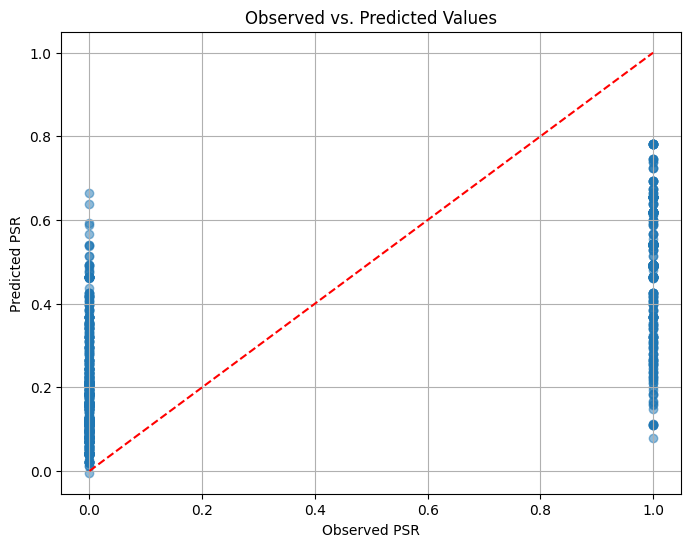

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Classifier/Sample/processed_utterances_with_date.csv"
data = pd.read_csv(file_path)

# Calculate log_engagement from score and num_comments
data['log_engagement'] = np.log(data['score'] + data['num_comments'] + 1)

# Construct the mixed regression model
mixed_model = sm.MixedLM.from_formula("PSR ~ gender + top_level_comment + has_flair + is_stickied + (1 | random_speaker) + (1 | date)",
                                      groups='random_speaker', data=data)
result = mixed_model.fit()

# Get the predicted values
predicted_values = result.fittedvalues

# Plot observed vs. predicted values for each predictor
predictor_variables = ['gender', 'top_level_comment', 'has_flair', 'is_stickied']

for predictor in predictor_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], data['PSR'], label='Observed', alpha=0.5)
    plt.scatter(data[predictor], predicted_values, label='Predicted', alpha=0.5)
    plt.title(f'Observed vs. Predicted Values for {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('PSR')
    plt.legend()
    plt.grid(True)
    plt.show()



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Sample/coded_sample.csv"
data = pd.read_csv(file_path)

# Calculate log_engagement from score and num_comments
data['log_engagement'] = np.log(data['score'] + data['num_comments'] + 1)

# Cast PSR column as binary
data['PSR_binary'] = data['PSR'].astype(int)

# Construct the logistic regression model
logit_model = sm.Logit(data['PSR_binary'], 
                       sm.add_constant(data[['log_engagement', 'top_level_comment', 'is_stickied', 'has_flair']]))
results = logit_model.fit()

# Predict PSR probabilities
data['predicted_PSR'] = results.predict()

# Plot the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_engagement'], y=data['PSR_binary'], color='blue', label='Actual')
sns.lineplot(x=data['log_engagement'], y=data['predicted_PSR'], color='red', label='Predicted')
plt.xlabel('Engagement (log)')
plt.ylabel('Probability of PSR')
plt.title('Logistic Regression Plot')
plt.legend()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/Users/admin/Documents/University/diss-data-collection/Sample/coded_sample.csv"
data = pd.read_csv(file_path)

# Create a new column 'log_engagement' by taking the logarithm of the sum of 'score' and 'num_comments' columns
data['log_engagement'] = np.log(data['score'] + data['num_comments'] + 1)

# Display the DataFrame with the new column
print(data[['score', 'num_comments', 'log_engagement']])


      score  num_comments  log_engagement
0         2             2        1.609438
1         3             1        1.609438
2         2             0        1.098612
3         0             8        2.197225
4         2             1        1.386294
...     ...           ...             ...
1995      1             8        2.302585
1996      9            29        3.663562
1997      2             4        1.945910
1998      1             1        1.098612
1999      1             1        1.098612

[2000 rows x 3 columns]


/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
file_path = "/Users/admin/Downloads/coded_sample.csv"
data = pd.read_csv(file_path)

# Calculate log_engagement from score and num_comments
data['log_engagement'] = np.log(data['score'] + data['num_comments'] + 1)

# Construct the logistic regression model
logit_model = sm.Logit(data['log_engagement'], 
                       sm.add_constant(data[['PSR', 'top_level_comment', 'is_stickied', 'has_flair']]))
results = logit_model.fit()

# Print the summary of the logistic regression model
print(results.summary())


/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: endog must be in the unit interval.

In [14]:
# Construct the mixed effects model
exog = data[['gender', 'top_level_comment', 'has_flair', 'is_stickied']]
endog = data['log_engagement']
groups = data['subreddit']
mixed_model = sm.MixedLM(endog, exog, groups)
result = mixed_model.fit()

# Get the parameter estimates and confidence intervals
params = result.fe_params
conf_int = result.conf_int(alpha=0.05)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=params.index, y=params.values, ci=conf_int.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predictor')
plt.ylabel('Estimate')
plt.title('Coefficients and Confidence Intervals from Mixed Effects Model')
plt.tight_layout()
plt.show()


/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/admin/Documents/University/diss-data-collection/.conda/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/admin/Docu

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x600 with 0 Axes>